Creating a Convolutional Neural Network (CNN) from scratch for MNIST handwritten digit classification is a great way to understand the fundamentals of deep learning and convolutional layers. We'll walk through the steps needed to develop, evaluate, and use a CNN for this task. We will use Python and popular libraries such as TensorFlow and Keras.

Steps to Develop a CNN for MNIST Classification
Import Libraries
Load and Preprocess the Data
Build the CNN Model
Compile the Model
Train the Model
Evaluate the Model
Save and Load the Model
Make Predictions

Here's a step-by-step guide:

1. Import Libraries
First, let's import the necessary libraries:

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint


2. Load and Preprocess the Data
Load the MNIST dataset, normalize the pixel values, and prepare the data for training and testing:

In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the data to include the channel dimension and normalize
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


3. Build the CNN Model
Create a CNN model using Sequential:

In [ ]:
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10 classes for digits 0-9


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4. Compile the Model
Configure the model for training:

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


5. Train the Model
Train the model with the training data and validate it with the test data. Use ModelCheckpoint to save the best model:

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Set up the checkpoint callback with the .keras extension
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Train the model with the updated checkpoint callback
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[checkpoint])


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 52s 66ms/step - accuracy: 0.8223 - loss: 0.5845 - val_accuracy: 0.9706 - val_loss: 0.0928
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 67ms/step - accuracy: 0.9728 - loss: 0.0855 - val_accuracy: 0.9812 - val_loss: 0.0635
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 68ms/step - accuracy: 0.9806 - loss: 0.0603 - val_accuracy: 0.9758 - val_loss: 0.0769
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 67ms/step - accuracy: 0.9853 - loss: 0.0425 - val_accuracy: 0.9842 - val_loss: 0.0492
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 65ms/step - accuracy: 0.9898 - loss: 0.0324 - val_accuracy: 0.9826 - val_loss: 0.0585
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 67ms/step - accuracy: 0.9911 - loss: 0.0289 - val_accuracy: 0.9862 - val_loss: 0.0467
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 67ms/step - accuracy: 0.9926 - loss: 0.0218 - val_accuracy: 0.9876 - val_loss: 0.0433
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 65ms/step - accuracy: 0.9937 - loss: 0.0182 - 

6. Evaluate the Model
Evaluate the model on the test set:

In [ ]:
# Load the best model (optional, if not using the checkpoint callback)
# model.load_weights('best_model.h5')

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_acc:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9779 - loss: 0.0827
Test loss: 0.0610
Test accuracy: 0.9825


7. Save and Load the Model
You can save and load the entire model using model.save() and tf.keras.models.load_model():

In [ ]:
# Save the entire model
model.save('mnist_cnn_model.h5')

# Load the model
loaded_model = tf.keras.models.load_model('mnist_cnn_model.h5')


8. Make Predictions
Use the loaded model to make predictions on new data:

In [ ]:
# Make predictions
predictions = loaded_model.predict(x_test)

# Convert predictions from probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [ ]:
import matplotlib.pyplot as plt


Plot Training and Validation Accuracy

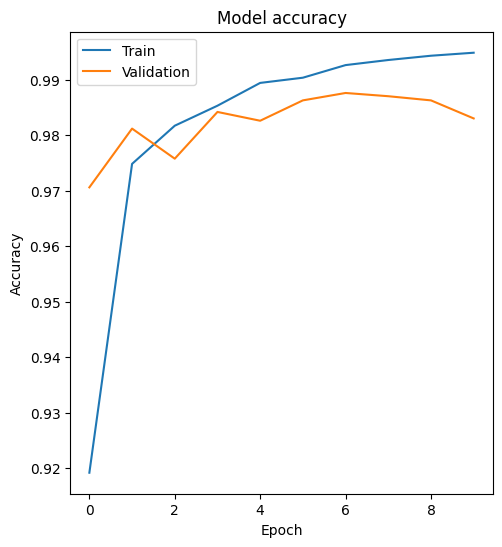

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])


Plot Training and Validation Loss

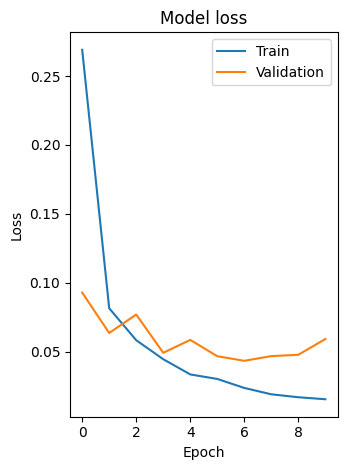

In [ ]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()


Here's the complete code snippet to visualize both accuracy and loss:

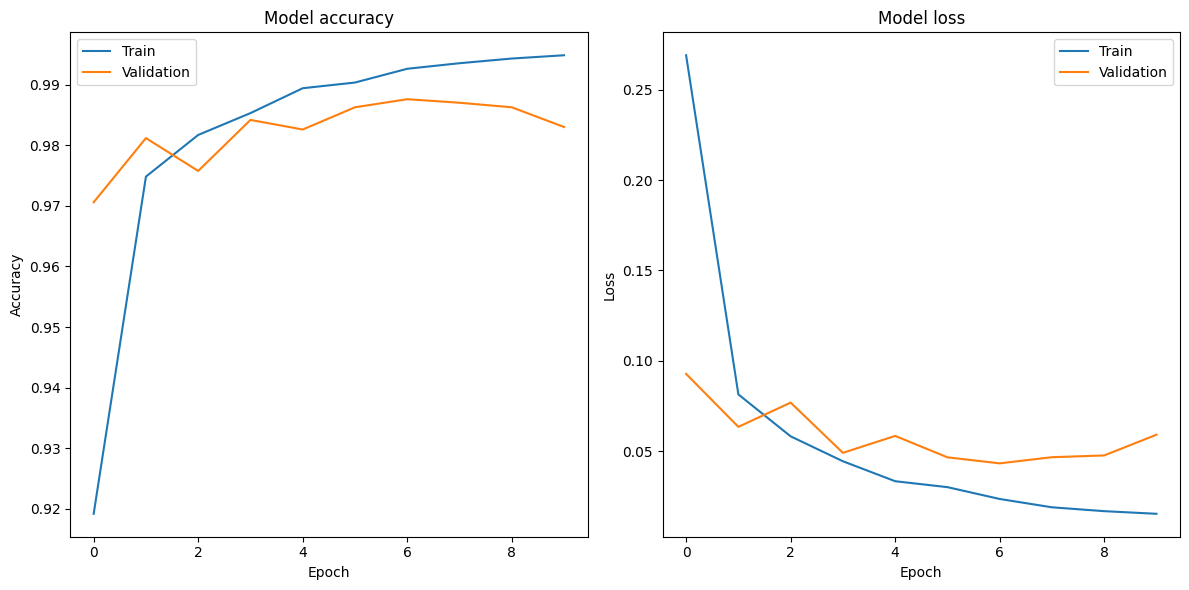

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()
